# [A Regret Minimization Approach to Iterative Learning Control](https://arxiv.org/pdf/2102.13478.pdf )

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp
from deluca.igpc.ilqr import iLQR
from deluca.envs import Reacher

### System - Reacher ([deluca implementation](https://github.com/google/deluca/blob/main/deluca/envs/classic/_reacher.py))
### Algorithms Compared
* **Closed Loop ILQG** - [Li,Todorov](https://homes.cs.washington.edu/~todorov/papers/LiICINCO04.pdf) ([deluca implementation](https://github.com/MinRegret/deluca-igpc/blob/main/deluca/igpc/ilqr.py))

* **iLC - Iterative Learning Control** [Abeel et al.](https://ai.stanford.edu/~ang/papers/icml06-usinginaccuratemodelsinrl.pdf) ([deluca implementation](https://github.com/MinRegret/deluca-igpc/blob/main/deluca/igpc/ilc.py))

* **iGPC - Iterative GPC** [Agarwal et. al.](https://arxiv.org/abs/2102.13478) ([deluca implementation](https://github.com/MinRegret/deluca-igpc/blob/main/deluca/igpc/igpc.py)

In [3]:
def cost(x, u, sim):
    return 0.1 * u @ u + x.arr[4:] @ x.arr[4:]
env_true, env_sim = Reacher.create(g=30.0), Reacher.create()
#Initialize actions
U0 = jnp.tile(jnp.zeros(env_sim.action_dim), (env_sim.H, 1))
# Warm up with via iLQG on the sim
X, U, k, K, c = iLQR(env_sim, cost, U0, 6, verbose=False)

In [4]:
%%capture iLC_output
## Run ILC
from deluca.igpc.ilc import iLC_closed
T = 10
iLC_result = iLC_closed(env_true, env_sim, cost, U, T, k, K, X, ref_alpha=0.5)
# Cell takes about 54 seconds to run

In [5]:
# iLC Trace
iLC_output()

iLC: t = -1, r = 1, c = 4322.26123046875
iLC (closed+alpha=0.5): t = 0, r = 2, c = 2470.9970703125, alpha = 0.550000011920929
iLC (closed+alpha=0.5): t = 1, r = 3, c = 1753.77783203125, alpha = 0.6050000190734863
iLC (closed+alpha=0.5): t = 2, r = 4, c = 1603.722900390625, alpha = 0.6655000448226929
iLC (closed+alpha=0.5): t = 3, r = 5, c = 1576.240234375, alpha = 0.7320500612258911
iLC (closed+alpha=0.5): t = 4, r = 6, c = 1546.8001708984375, alpha = 0.8052550554275513
iLC (closed+alpha=0.5): t = 5, r = 7, c = 1530.50732421875, alpha = 0.8857805728912354
iLC (closed+alpha=0.5): t = 6, r = 8, c = 1521.5250244140625, alpha = 0.9743586182594299
Backtracking failed - Quitting


In [6]:
%%capture iGPC_output
# Run iGPC
from deluca.igpc.igpc import iGPC_closed
T = 10
iGPC_result = iGPC_closed(env_true, env_sim, cost, U, T, k, K, X, 'de', ref_alpha=0.5, lr=0.03)
# Cell takes about ~5min to run

In [7]:
#iGPC Trace
iGPC_output()

iGPC: t = -1, r = 1, c = 4322.26123046875
iGPC: t = 0, r = 2, c = 2443.56298828125, alpha = 0.550000011920929, lr = 0.03
iGPC: t = 1, r = 3, c = 1710.015380859375, alpha = 0.6050000190734863, lr = 0.03
iGPC: t = 2, r = 4, c = 1564.369140625, alpha = 0.6655000448226929, lr = 0.03
iGPC: t = 3, r = 5, c = 1534.8509521484375, alpha = 0.7320500612258911, lr = 0.03
iGPC: t = 4, r = 6, c = 1501.7266845703125, alpha = 0.8052550554275513, lr = 0.03
iGPC: t = 5, r = 7, c = 1480.9365234375, alpha = 0.8857805728912354, lr = 0.03
iGPC: t = 6, r = 8, c = 1464.270751953125, alpha = 0.9743586182594299, lr = 0.03
iGPC: t = 7, r = 9, c = 1453.5308837890625, alpha = 1.0717945098876953, lr = 0.03
iGPC: t = 8, r = 10, c = 1446.9398193359375, alpha = 1.178973913192749, lr = 0.03
iGPC: t = 9, r = 11, c = 1444.40625, alpha = 1.296871304512024, lr = 0.03
1626709240.5136142


In [8]:
%%capture iLQRO_output
## Running the ILQR(Oracle) - This is the unachievable baseline
iLQRO_result = iLQR(env_true, cost, U, 10, k, K, X, verbose=True)

In [9]:
iLQRO_output()

iLQR (true): t = -1, r = 1, c = 4322.26123046875
iLQR (true): t = 0, r = 2, alphac = 0.550000011920929, cost = 1898.591796875
iLQR (true): t = 0, r = 2, c = 1898.591796875
iLQR (true): t = 1, r = 3, alphac = 0.6050000190734863, cost = 1235.0311279296875
iLQR (true): t = 1, r = 3, c = 1235.0311279296875
iLQR (true): t = 2, r = 4, alphac = 0.6655000448226929, cost = 1048.5633544921875
iLQR (true): t = 2, r = 4, c = 1048.5633544921875
iLQR (true): t = 3, r = 5, alphac = 0.7320500612258911, cost = 965.6436157226562
iLQR (true): t = 3, r = 5, c = 965.6436157226562
iLQR (true): t = 4, r = 6, alphac = 0.8052550554275513, cost = 949.9563598632812
iLQR (true): t = 4, r = 6, c = 949.9563598632812
iLQR (true): t = 5, r = 7, alphac = 0.8857805728912354, cost = 947.5916748046875
iLQR (true): t = 5, r = 7, c = 947.5916748046875
iLQR (true): t = 6, r = 8, alphac = 0.9743586182594299, cost = 946.9810180664062
iLQR (true): t = 6, r = 8, c = 946.9810180664062
iLQR (true): t = 7, r = 9, alphac = 1.071794

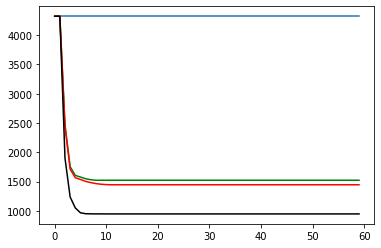

In [10]:
import matplotlib.pyplot as plt
from deluca.igpc.plot_utils import process_for_plot, zero_cost

iLC_perf = process_for_plot(str(iLC_output.stdout), 60)
iGPC_perf = process_for_plot(str(iGPC_output.stdout), 60)
iLQRO_perf = process_for_plot(str(iLQRO_output.stdout), 60)
iLQG_cost = zero_cost(str(iLC_output.stdout))

plt.plot(list(range(60)), [iLQG_cost]*60)
plt.plot(iLC_perf[0], iLC_perf[1], 'green')
plt.plot(iGPC_perf[0], iGPC_perf[1], 'red')
plt.plot(iLQRO_perf[0], iLQRO_perf[1], 'black')